In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [76]:
trainDF = pd.read_csv('train.csv')
testDF = pd.read_csv('test.csv')

In [77]:
trainDF.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [78]:
testDF.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [79]:
X=trainDF.iloc[:,2:].values
y=trainDF.iloc[:,1].values
X[0,:]

array([3, 'Braund, Mr. Owen Harris', 'male', 22.0, 1, 0, 'A/5 21171',
       7.25, nan, 'S'], dtype=object)

In [80]:
X=np.delete(X,[1,6,8],axis=1)
X[0,:]

array([3, 'male', 22.0, 1, 0, 7.25, 'S'], dtype=object)

In [81]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
X[:,1] = le.fit_transform(X[:,1])
X[0,:]

array([3, 1, 22.0, 1, 0, 7.25, 'S'], dtype=object)

In [82]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy ='most_frequent')
imputer.fit(X[:, 6:7])
X[:, 6:7] = imputer.transform(X[:, 6:7])

In [83]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(), [6])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))


In [85]:
imputer = SimpleImputer(missing_values=np.nan, strategy ='mean')
imputer.fit(X[:, 5:6])
X[:, 5:6] = imputer.transform(X[:, 5:6])

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [56]:
'''from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 3:4] = sc.fit_transform(X_train[:, 3:4])
X_test[:, 3:4] = sc.transform(X_test[:, 3:4])
print(X_test[0,:])'''

[0.0 0.0 1.0 -1.5555930485121332 0 48.0 0 0 25.9292]


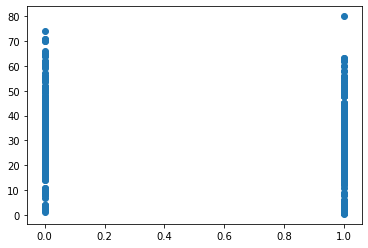

In [87]:
plt.scatter(Y_train,X_train[:,5])